<a href="https://colab.research.google.com/github/chjameskumar/Task_7/blob/main/Assignment_13_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [54]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

**Importing the dataset**

In [23]:
data = pd.read_csv('Social_Network_Ads.csv')

In [24]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# as we know User id is not useful for this model so we are removing it

In [25]:
del data['User ID']

In [ ]:
# Handling categorical feature Gender using One Hot Encoder

In [26]:
ohe = OneHotEncoder(sparse = False)

In [27]:
data_gender = ohe.fit_transform(data[['Gender']])

In [28]:
data_gender = pd.DataFrame(data_gender)

In [29]:
del data['Gender']

In [30]:
data.reset_index(drop = True, inplace = True)
data_gender.reset_index(drop = True, inplace = True)

In [31]:
data = pd.concat([data, data_gender], axis = 1)

In [39]:
data

,Age,EstimatedSalary,Purchased,0,1
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0
...,...,...,...,...,...
395,46,41000,1,1.0,0.0
396,51,23000,1,0.0,1.0
397,50,20000,1,1.0,0.0
398,36,33000,0,0.0,1.0


**Splitting the dataset into the Training set and Test set**

In [42]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [47]:
ss = StandardScaler()

In [48]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


**Fitting K-NN to the Training set**

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
print(knn.score(X_train, y_train))

0.909375


**Predicting the Test set results**

In [52]:
print(knn.score(X_test, y_test))

0.95


**Making the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


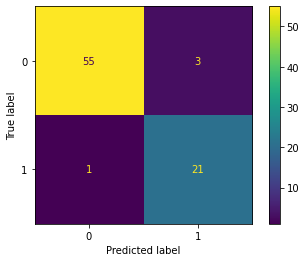

In [55]:
plot_confusion_matrix(knn, X_test, y_test)